In [98]:
import numpy as np
from scipy import optimize


# Linear Programming minimizes by default, so we need to add a - to the vector c
c = [-1400,-420,-700]
A = [[1,0.3,0.5],[1.6, 0.4, 0.6],[1,1,1]]
b = [400,600,1250]

sol = optimize.linprog(c, A, b)

In [99]:
print("The optimum solution is:\n  * Corn: ",sol.x[0]," acre\n  * Wheat: ",sol.x[1]," acre\n  * Oats: ",sol.x[2]," acre")
print("The yield is $", -sol.fun)

The optimum solution is:
  * Corn:  299.9999999999999  acre
  * Wheat:  0.0  acre
  * Oats:  200.00000000000023  acre
The yield is $ 560000.0


In [ ]:
sol

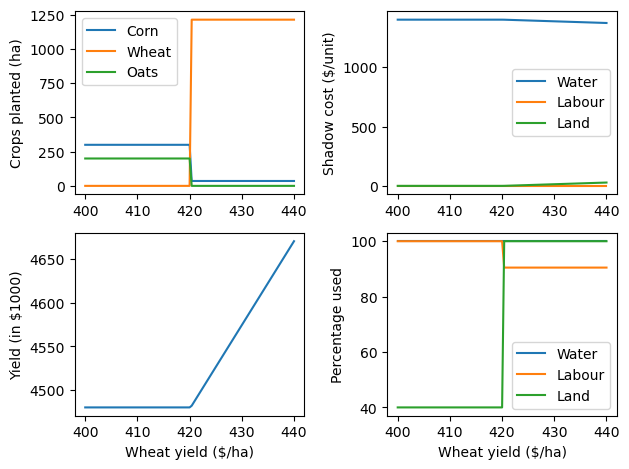

In [114]:
import matplotlib.pyplot as plt

# Let us study what happens for different prices of Oats from $240 to $260

# Linear Programming minimizes by default, so we need to add a - to the vector c
c = lambda x: [-1400,-x,-700]
A = [[1,0.3,0.5],[1.6, 0.4, 0.6],[1,1,1]]
b = [400,600,1250]

wheatmin=400
wheatmax=440
N = 101
delta = (wheatmax-wheatmin)/N

corn = np.zeros(N)
wheat = np.zeros(N)
oats = np.zeros(N)
t_yield = np.zeros(N)
water = np.zeros(N)
labour = np.zeros(N)
land = np.zeros(N)

water_used = np.zeros(N)
labour_used = np.zeros(N)
land_used = np.zeros(N)
         
for i in range(N):
    wheat_p = wheatmin+delta*i

    sol[i] = optimize.linprog(c(wheat_p), A, b)

    corn[i] = sol[i].x[0]
    wheat[i] = sol[i].x[1]
    oats[i] = sol[i].x[2]

    t_yield[i] = -sol[i].fun/125

    water[i] = -sol[i].ineqlin.marginals[0]
    labour[i] = -sol[i].ineqlin.marginals[1]
    land[i] = -sol[i].ineqlin.marginals[2]

    water_used[i] = 100*(1*corn[i]+0.3*wheat[i]+0.5*oats[i])/400
    labour_used[i] = 100*(1.6*corn[i]+0.4*wheat[i]+0.6*oats[i])/600
    land_used[i] = 100*(corn[i]+wheat[i]+oats[i])/1250

wheat_x = np.linspace(wheatmin, wheatmax, N)


figure, axis = plt.subplots(2,2)


axis[0,0].plot(wheat_x, corn, wheat_x, wheat, wheat_x, oats)
axis[0,0].set_ylabel("Crops planted (ha)")
#axis[0].set_xlabel("Wheat yield ($/ha)")
axis[0,0].legend(["Corn","Wheat","Oats"])


axis[1,0].plot(wheat_x, t_yield)
axis[1,0].set_ylabel("Yield (in $1000)")
axis[1,0].set_xlabel("Wheat yield ($/ha)")


axis[0,1].plot(wheat_x, water, wheat_x, labour, wheat_x, land)
axis[0,1].set_ylabel("Shadow profit ($/unit)")
#axis[0,1].set_xlabel("Wheat yield ($/ha)")
axis[0,1].legend(["Water","Labour","Land"])

axis[1,1].plot(wheat_x, water_used, wheat_x, labour_used, wheat_x, land_used)
axis[1,1].set_ylabel("Percentage used")
axis[1,1].set_xlabel("Wheat yield ($/ha)")
axis[1,1].legend(["Water","Labour","Land"])

plt.tight_layout()

#plt.savefig("farm-linearprog.png",bbox_inches = "tight")
plt.show()

